In [3]:
pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.8 MB/s eta 0:00:00:00:0100:01
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=851430 sha256=4a3b44bcc1c712579f64694333653e25048f832f1dade0740094c2821627fb47
  Stored in directory: /home/codespace/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_780/3057476998.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (data['Adj Close'][-1] / data['Adj Close'][0]) - 1


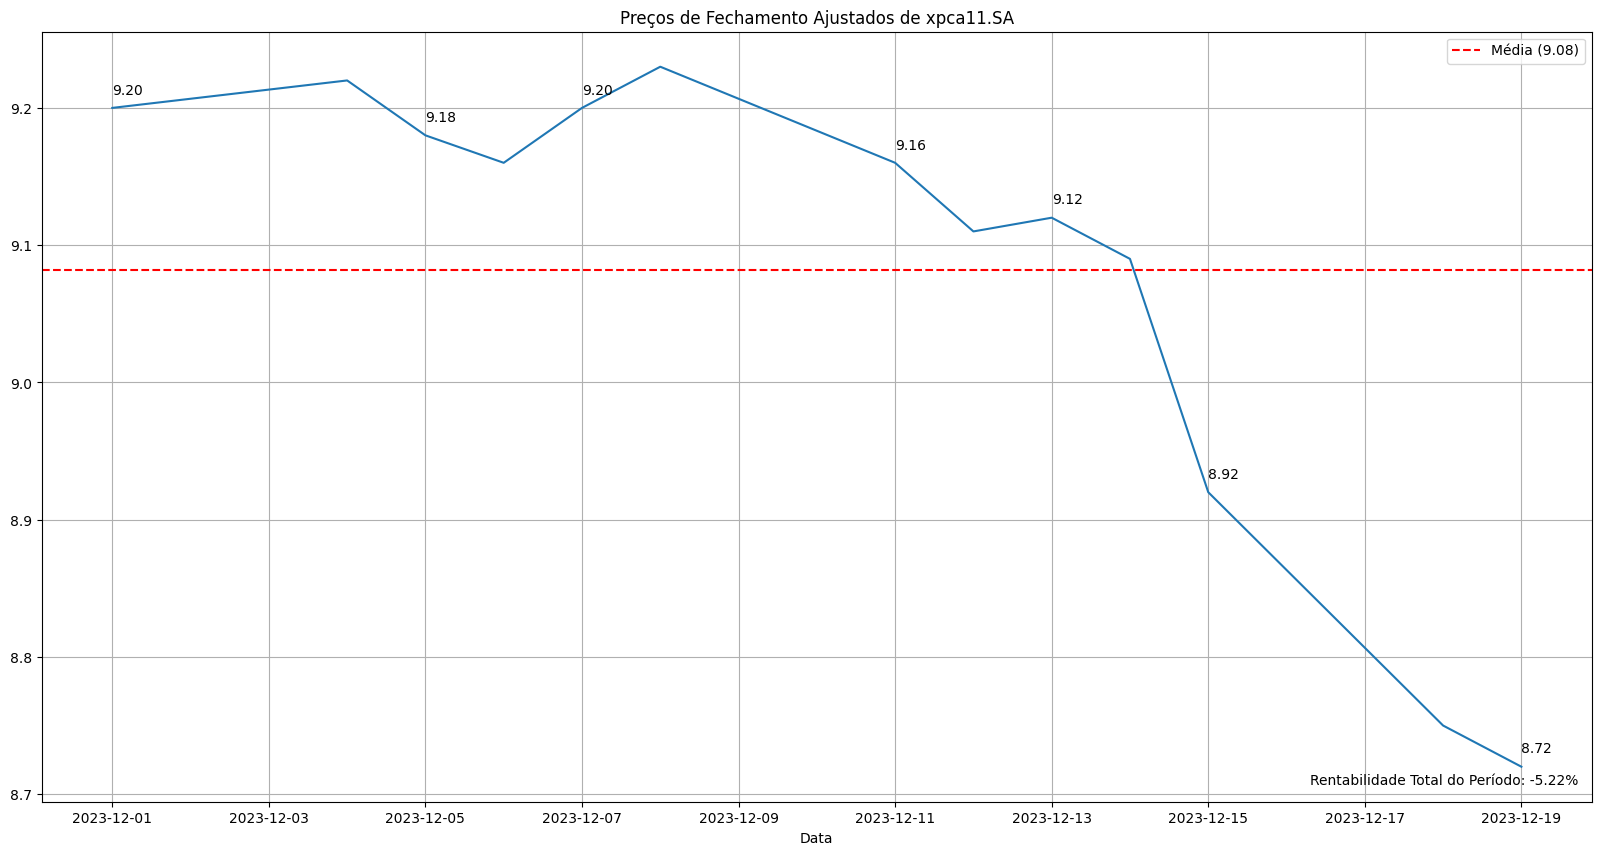

In [11]:
# Define o ticker da ação desejada
ticker = "USIM5.SA"

# Define o intervalo de datas desejado para os dados históricos
data_atual= datetime.now()
start_date = "2023-12-01" 
end_date = "2023-12-20" #data_atual.strftime("%y-%m-%d")

# Obtém os dados históricos da ação usando a biblioteca yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Calcula a rentabilidade diária com base nos preços de fechamento ajustados
data['Daily_Return'] = data['Adj Close'].pct_change()

# Calcula a rentabilidade total do período
total_return = (data['Adj Close'][-1] / data['Adj Close'][0]) - 1

# Calcula a média dos preços de fechamento ajustados
media_preco = data['Adj Close'].mean()


# Plota o gráfico de preços de fechamento ajustados diários
plt.figure(figsize=(20, 10))
plt.plot(data['Adj Close'])
plt.title(f"Preços de Fechamento Ajustados de {ticker}")
plt.xlabel("Data")
plt.grid(True)

# Adiciona a linha tracejada da média
plt.axhline(y=media_preco, color='r', linestyle='--', label=f'Média ({media_preco:.2f})')


# Define o espaçamento entre os valores a serem exibidos
spacing = 2

# Adiciona os valores de preço nas linhas do gráfico com o espaçamento
for index, value in enumerate(data['Adj Close']):
    if index % spacing == 0:  # Exibe somente a cada 'spacing' pontos
        plt.annotate(f'{value:.2f}', (data.index[index], value), textcoords="offset points", xytext=(0,10), ha='left')

plt.legend()

# Exibe a rentabilidade total do período fora do gráfico
plt.annotate(f'Rentabilidade Total do Período: {total_return:.2%}',
             xy=(1, 0), xycoords='axes fraction',
             xytext=(-10, 10), textcoords='offset points',
             ha='right', va='bottom')

plt.show()
